In [ ]:
!unzip dataset100.zip

# Imports

In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras import datasets, layers, models, regularizers
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt

# Utils

In [ ]:
def load_dataset(size):
  if size == 100:

    cm = [x for x in os.walk('CM100')][0][2]
    hs = [x for x in os.walk('HS100')][0][2]
    hc = [x for x in os.walk('HC100')][0][2]

  elif size == 200:
    cm = [x for x in os.walk('CM200')][0][2]
    hs = [x for x in os.walk('HS200')][0][2]
    hc = [x for x in os.walk('HC200')][0][2]
  
  else:
    return 'invalid size'
  
  cm = ['CM100/' + cm[x] for x in range(len(cm))]
  hs = ['HS100/' + hs[x] for x in range(len(hs))]
  hc = ['HC100/' + hc[x] for x in range(len(hc))]
  
  cm_label = [0]*len(cm)
  hs_label = [1]*len(hs)
  hc_label = [2]*len(hc)

  dataset = cm+hs+hc
  labels = cm_label + hs_label + hc_label

  return dataset, labels

In [ ]:
def read_images(dataset):
  images = []
  
  for filepath in dataset:
    images.append(cv2.imread(filepath))
  
  return images

In [ ]:
dataset, labels = load_dataset(100)

In [ ]:
dataset = read_images(dataset)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3, random_state=42)

In [ ]:
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train[0]

array([[[0.61176471, 0.49411765, 0.38039216],
        [0.61176471, 0.49411765, 0.38039216],
        [0.61568627, 0.49803922, 0.38431373],
        ...,
        [0.61568627, 0.4745098 , 0.35686275],
        [0.61568627, 0.4745098 , 0.35686275],
        [0.61568627, 0.4745098 , 0.35686275]],

       [[0.61176471, 0.49411765, 0.38039216],
        [0.61568627, 0.49803922, 0.38431373],
        [0.61960784, 0.50196078, 0.38823529],
        ...,
        [0.61568627, 0.4745098 , 0.35686275],
        [0.61568627, 0.4745098 , 0.35686275],
        [0.61568627, 0.4745098 , 0.35686275]],

       [[0.61568627, 0.49803922, 0.38431373],
        [0.61568627, 0.49803922, 0.38431373],
        [0.61960784, 0.50196078, 0.38823529],
        ...,
        [0.60784314, 0.4745098 , 0.35686275],
        [0.60784314, 0.4745098 , 0.35686275],
        [0.60784314, 0.4745098 , 0.35686275]],

       ...,

       [[0.58823529, 0.55294118, 0.54117647],
        [0.56862745, 0.53333333, 0.52156863],
        [0.5254902 , 0

In [ ]:
y_train, y_test = np_utils.to_categorical(y_train), np_utils.to_categorical(y_test)

# Define Model

In [ ]:
#creating the network architecture
cnn = models.Sequential([
    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)),
    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Dropout(0.6),
    
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Dropout(0.5),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dense(3, activation='softmax')
])

cnn.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#creating the network architecture
cnn = models.Sequential([
    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Dropout(0.6),

    # layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
    # layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    # layers.MaxPooling2D((3, 3)),

    # layers.Dropout(0.6),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.04)),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.03)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 98, 98, 512)       14336     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 96, 96, 256)       1179904   
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 32, 256)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               134218240 
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)              

In [ ]:
cnn_history = cnn.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
35/35 [==============================] - 12s 309ms/step - loss: 20.4202 - accuracy: 0.3558 - val_loss: 8.7381 - val_accuracy: 0.3482
Epoch 2/30
35/35 [==============================] - 11s 309ms/step - loss: 6.4081 - accuracy: 0.4097 - val_loss: 4.9714 - val_accuracy: 0.4310
Epoch 3/30
35/35 [==============================] - 11s 305ms/step - loss: 4.1956 - accuracy: 0.4681 - val_loss: 3.5145 - val_accuracy: 0.5626
Epoch 4/30
35/35 [==============================] - 10s 300ms/step - loss: 3.2242 - accuracy: 0.5794 - val_loss: 2.9158 - val_accuracy: 0.5796
Epoch 5/30
35/35 [==============================] - 10s 295ms/step - loss: 2.6989 - accuracy: 0.5839 - val_loss: 2.3352 - val_accuracy: 0.6051
Epoch 6/30
35/35 [==============================] - 10s 294ms/step - loss: 2.2244 - accuracy: 0.6068 - val_loss: 2.0130 - val_accuracy: 0.6476
Epoch 7/30
35/35 [==============================] - 10s 294ms/step - loss: 1.9592 - accuracy: 0.6432 - val_loss: 1.7439 - val_accuracy: 0.713

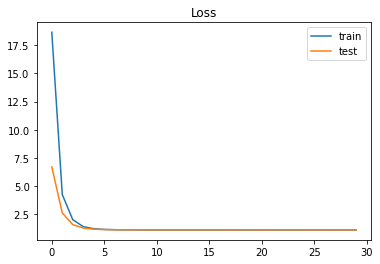

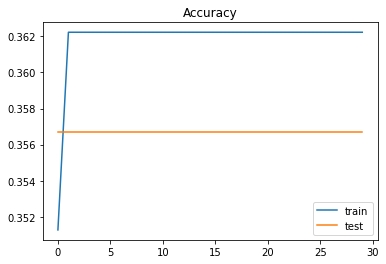

In [ ]:
#plotting loss graph
plt.figure()
plt.title('Loss')
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.legend(['train', 'test'])
plt.show()

#plotting accuracy graph
plt.figure()
plt.title('Accuracy')
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.show()

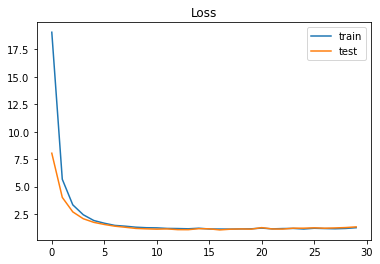

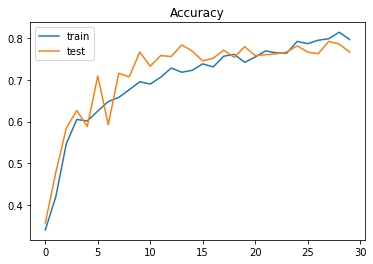

In [ ]:
#plotting loss graph
plt.figure()
plt.title('Loss')
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.legend(['train', 'test'])
plt.show()

#plotting accuracy graph
plt.figure()
plt.title('Accuracy')
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.show()